# Verinin Toplanması

Veri çekme işlemi için gerekli importları yapalım.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from tickers import TICKERS

Yahoo Finance API'nı kullanarak son 10 yıllık veriyi çekelim.

In [28]:
tickers = [ticker + '.IS' for ticker in TICKERS]
df = yf.download(tickers, period='10y', interval='1d', auto_adjust=False, threads=True)['Close']

[*********************100%***********************]  100 of 100 completed


Şimdi çektiğimiz verilerden outlierları temizleyelim. (Veri sayısına göre)

Öncelikle histogram çizdiren bir metod tanımlayalım.

In [ ]:
import matplotlib.pyplot as plt
def plot_histogram(data, bins=30, name="Hisselerin Veri Noktası Sayısına Göre Dağılımı"):
    plt.figure(figsize=(10, 6))
    plt.hist(df.count(), bins, edgecolor='black')
    plt.xlabel("Veri Noktası Sayısı")
    plt.ylabel("Hisse Sayısı")
    plt.title(name)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Şimdi veri noktalarının dağılımına bakalım

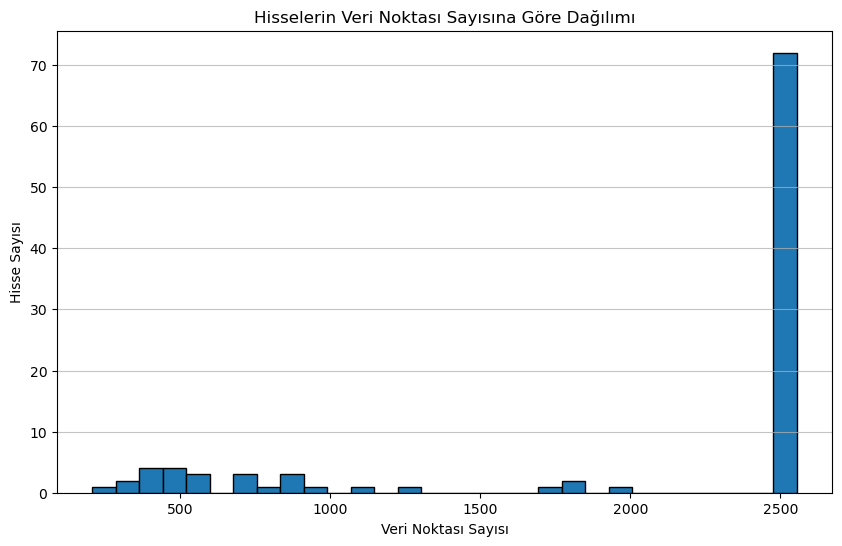

In [44]:
plot_histogram(df)

Görüldüğü üzere veri noktası sayısı 2000'in üzerinde olan çok hisse var. Geri kalanında ise çok fazla eksik veri noktası bulunuyor. Bu yüzden 2000 thresholdunu kullanarak verileri filtreleyelim.

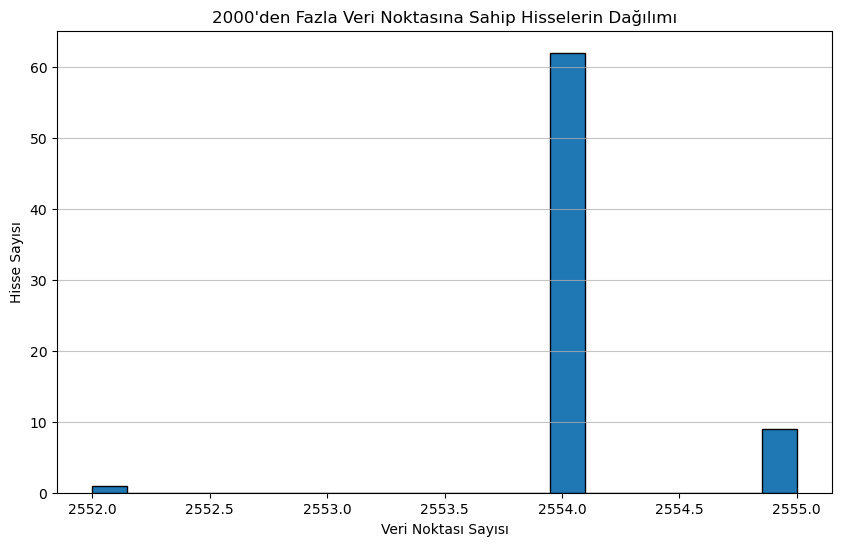

In [45]:
df = df.loc[:, df.count() > 2000]
plot_histogram(df, 20, "2000'den Fazla Veri Noktasına Sahip Hisselerin Dağılımı")

Görüldüğü üzere hala eksik noktalar var. Bunlar çok fazla olmadığı için basit bir "forward fill" ile bu noktaları tamamlayabiliriz.

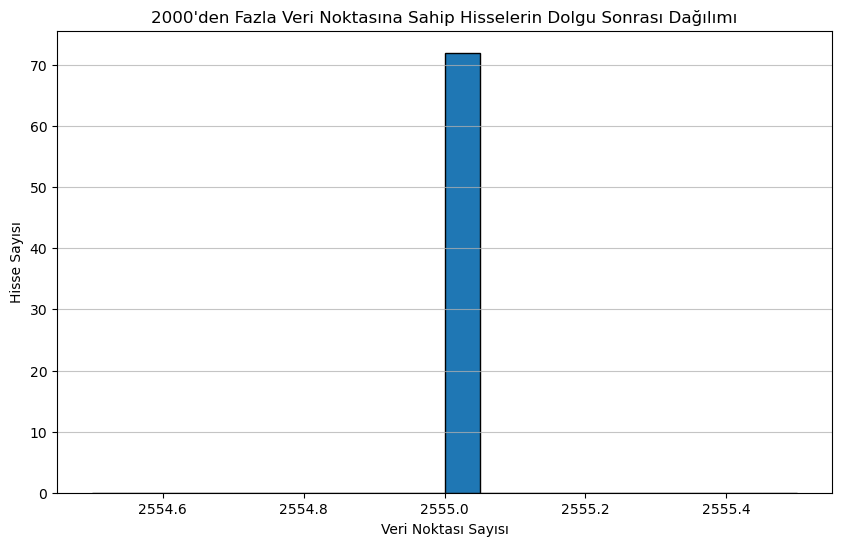

In [47]:
df.ffill(inplace=True)
plot_histogram(df, 20, "2000'den Fazla Veri Noktasına Sahip Hisselerin Dolgu Sonrası Dağılımı")

Son olarak veri setimiz hakkında bilgileri görelim.

In [50]:
display(f"Elimizdeki hisse sayısı: {len(df.columns)}")
display(f"Elimizdeki veri noktası: {df.count().iloc[0]}")
display(df.head())

'Elimizdeki hisse sayısı: 72'

'Elimizdeki veri noktası: 2555'

Ticker,AEFES.IS,AGHOL.IS,AKBNK.IS,AKSA.IS,AKSEN.IS,ALARK.IS,ANHYT.IS,ANSGR.IS,ARCLK.IS,ASELS.IS,...,TTKOM.IS,TTRAK.IS,TUKAS.IS,TUPRS.IS,TURSG.IS,ULKER.IS,VAKBN.IS,VESTL.IS,YKBNK.IS,ZOREN.IS
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-12,19.450001,20.600000,6.379393,0.441904,1.355,1.967537,4.621864,1.38,14.15,1.48125,...,7.16,42.026665,0.309259,7.321428,0.470983,18.50,4.49,7.01,2.653515,0.844716
2015-03-13,19.650000,20.549999,6.353670,0.433809,1.340,1.931576,4.551166,1.37,13.75,1.46875,...,6.80,42.453335,0.301851,7.192857,0.463262,17.60,4.29,6.37,2.614872,0.801837
2015-03-16,19.600000,20.850000,6.525159,0.430952,1.330,1.941851,4.515817,1.38,14.30,1.51875,...,7.00,43.360001,0.309259,7.342857,0.467123,17.35,4.44,6.38,2.659956,0.797549
2015-03-17,20.200001,21.150000,6.662350,0.439523,1.395,1.972674,4.498143,1.38,14.35,1.51250,...,7.25,45.759998,0.309259,7.642857,0.470983,18.10,4.54,6.81,2.717921,0.840428
2015-03-18,20.200001,21.650000,6.576606,0.442857,1.430,1.957262,4.595352,1.38,14.60,1.50000,...,7.29,47.200001,0.303703,7.585714,0.480635,18.90,4.46,6.40,2.672837,0.823276


Son olarak verimizi kaydedelim.

In [136]:
df.to_csv('data.csv')

In [ ]:
df = [-504:]

# Gerekli Kavramların İncelenmesi

### Durağanlık/Durağan Olmama  

Durağanlık, zaman serisi analizinde en sık test edilmeyen varsayımdır. Genellikle, veri üreten sürecin parametreleri zamanla değişmediğinde verinin durağan olduğunu varsayarız. Aksi takdirde, A ve B olmak üzere iki seri düşünelim. Seri A, sabit parametrelerle durağan bir zaman serisi üretirken, Seri B zamanla değişecektir.  

Bir olasılık yoğunluk fonksiyonu (PDF) için z-skoru oluşturan bir fonksiyon yazacağız. Gaussian dağılımı için olasılık yoğunluk fonksiyonu şu şekildedir:

$$ p(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

$\mu$ ortalama ve $\sigma$ standart sapmadır. Standart sapmanın karesi, $\sigma^{2}$, varyans olarak adlandırılır. Ampirik kurala göre, verilerin %66'sı $x+\sigma$ ve $x-\sigma$ arasında yer almalıdır, bu da `numpy.random.normal` fonksiyonunun ortalamaya yakın örnekler üretme olasılığının daha yüksek olduğunu, uzak değerlerin daha düşük olasılıkla üretileceğini ifade eder.


In [52]:
def generate_data(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

Şimdi bu fonksiyonu kullanarak birer adet durağan ve durağan olmayan iki adet grafik oluşturalım.

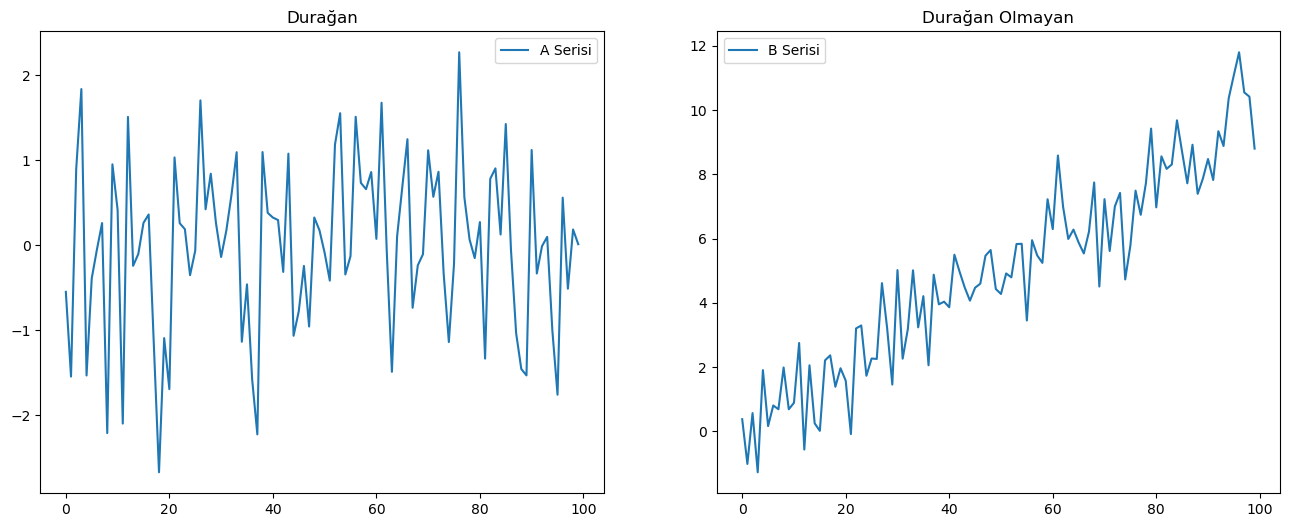

In [60]:
params = (0, 1)
T = 100

A = pd.Series(index=range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_data(params)

T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    params = (t * 0.1, 1)
    B[t] = generate_data(params)
    
fig, (ax1, ax2) = plt.subplots(nrows =1, ncols =2, figsize=(16,6))

ax1.plot(A)
ax2.plot(B)
ax1.legend(['A Serisi'])
ax2.legend(['B Serisi'])
ax1.set_title('Durağan')
ax2.set_title('Durağan Olmayan')
plt.show()

### Durağanlığın Neden Önemli Olduğu  

Birçok istatistiksel test, test edilen verinin durağan olmasını gerektirir. Durağan olmayan bir veri kümesi üzerinde belirli istatistikleri kullanmak anlamsız sonuçlara yol açabilir. Örneğin, durağan olmayan $B$ serimiz üzerinden bir ortalama alalım.

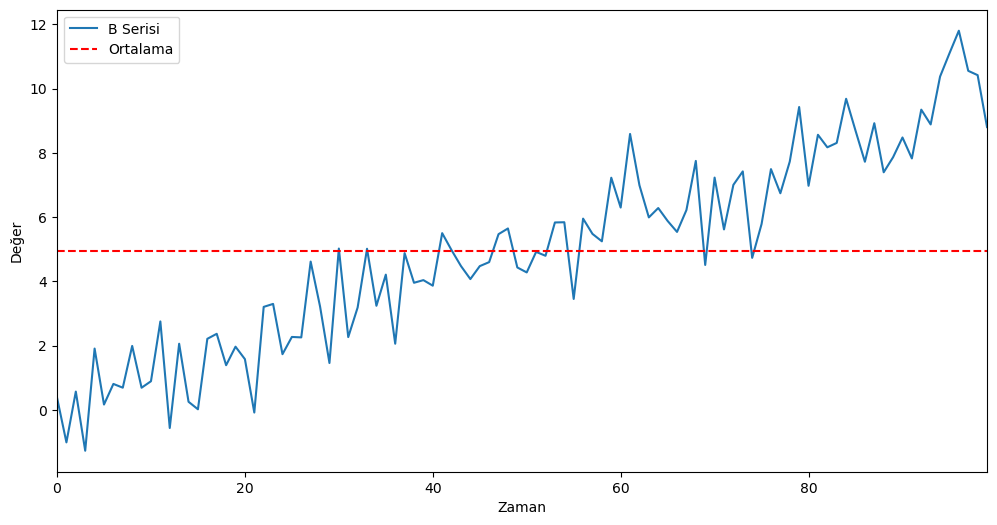

In [61]:
mean = np.mean(B)

plt.figure(figsize=(12,6))
plt.plot(B)
plt.hlines(mean, 0, len(B), linestyles='dashed', colors = 'r')
plt.xlabel('Zaman')
plt.xlim([0, 99])
plt.ylabel('Değer')
plt.legend(['B Serisi', 'Ortalama'])
plt.show()

Hesaplanan ortalama, tüm veri noktalarının ortalamasını gösterecektir, ancak gelecekteki durumu tahmin etmek için kullanışlı olmayacaktır. Farklı zamanlardaki farklı durumların bir araya getirilmesiyle oluştuğu için belirli bir zamanla karşılaştırıldığında anlamsızdır. Bu, durağan olmayan verilerin analizi nasıl bozabileceğine dair basit ve net bir örnektir, ancak pratikte çok daha ince ve karmaşık sorunlar ortaya çıkabilir.


#### Genişletilmiş Dickey-Fuller (ADF) Testi  

Durağanlığı test etmek için *birim kök* adı verilen bir şeyi test etmemiz gerekir. Otoregresif birim kök testleri aşağıdaki hipotez testine dayanır:

$$
\begin{aligned}
H_{0} & : \phi =\ 1\ \implies y_{t} \sim I(0) \ | \ (birim \ kök) \\
H_{1} & : |\phi| <\ 1\ \implies y_{t} \sim I(0) \ | \ (durağan)  \\
\end{aligned}
$$

Bu teste *birim kök testi* denir çünkü sıfır hipotezi altında, $\mathcal{z}_{t}$'nin otoregresif polinomu $\phi (\mathcal{z})=  (1-\phi \mathcal{z})  = 0$ bir kökü birime eşit olacak şekilde sahiptir.  

Sıfır hipotezi altında $y_{t}$ trend durağandır. Eğer $y_{t}$ birinci farkı alınırsa, aşağıdaki hale gelir:

$$
\begin{aligned}
\Delta y_{t} & = \delta\ + \Delta \mathcal{z}_{t} \\
\Delta\mathcal{z} & = \phi\Delta \mathcal{z}_{t-1}\ +\ \varepsilon_{t}\ -\ \varepsilon_{t-1} \\
\end{aligned}
.$$

Test istatistiği şu şekilde tanımlanır:

$$ t_{\phi=1}=\frac{\hat{\phi}-1}{SE(\hat{\phi})}$$


$\hat{\phi}$ en küçük kareler tahmini ve SE($\hat{\phi}$) standart hata tahminidir. Test, tek taraflı sol kuyruk testidir. Eğer {$y_{t}$} durağansa, şu gösterilebilir:

$$\sqrt{T}(\hat{\phi}-\phi)\xrightarrow[\text{}]{\text{d}}N(0,(1-\phi^{2}))$$

veya  

$$\hat{\phi}\overset{\text{A}}{\sim}N\bigg(\phi,\frac{1}{T}(1-\phi^{2}) \bigg)$$

Bundan dolayı, $t_{\phi=1}\overset{\text{A}}{\sim}N(0,1).$ Ancak, durağan olmama sıfır hipotezi altında, yukarıdaki sonuç şu şekilde olur:

$$
\hat{\phi}\overset{\text{A}}{\sim} N(0,1)
$$

Aşağıdaki fonksiyon, Genişletilmiş Dickey-Fuller (ADF) testini kullanarak durağanlığı kontrol etmemizi sağlayacaktır.


In [9]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [71]:
def stationarity_test(X, cutoff=0.01):
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' ' + X.name +' serisi muhtemelen durağandır.')
    else:
        print('p-value = ' + str(pvalue) + ' ' + X.name +' serisi muhtemelen durağan değildir.')

In [72]:
stationarity_test(A)
stationarity_test(B)

p-value = 3.8745356166234e-15 A serisi muhtemelen durağandır.
p-value = 0.9612623098199466 B serisi muhtemelen durağan değildir.


Görüldüğü gibi, zaman serisi A için test istatistiğine (belirli bir p-değeri ile ilişkili) dayanarak, sıfır hipotezini reddedemeyiz. Bu nedenle, Seri A muhtemelen durağandır. Öte yandan, Seri B için hipotez testi reddedildiğinden, bu zaman serisi muhtemelen durağan değildir.


### Eşbütünleşme (Cointegration)

Finansal büyüklükler arasındaki korelasyonlar genellikle istikrarsızdır. Buna rağmen, korelasyon hemen hemen tüm çok değişkenli finansal problemlerde düzenli olarak kullanılır. Korelasyona alternatif bir istatistiksel ölçü ise eşbütünleşmedir. Bu, iki finansal büyüklük arasındaki bağlantıyı ölçmede muhtemelen daha sağlam bir yöntemdir, ancak bu konsepte dayalı olarak türetilmiş teoriler hâlâ sınırlıdır.

İki hisse senedi kısa vadeli zaman dilimlerinde mükemmel şekilde korelasyonlu olabilir, ancak uzun vadede biri büyürken diğeri küçülebilir. Buna karşılık, iki hisse senedi her zaman belirli bir mesafeden fazla uzaklaşmadan birbirini takip edebilir, ancak korelasyonları pozitif, negatif veya değişken olabilir. Eğer delta hedging yapıyorsak, kısa vadeli korelasyon önemli olabilir, ancak uzun vadeli, korunmasız bir portföy tutuyorsak bu geçerli olmayabilir.

Eşbütünleşmiş iki zaman serisine dair bir örnek oluşturduk. Şimdi, bunlar arasındaki farkı görselleştirerek nasıl göründüğünü inceleyelim.


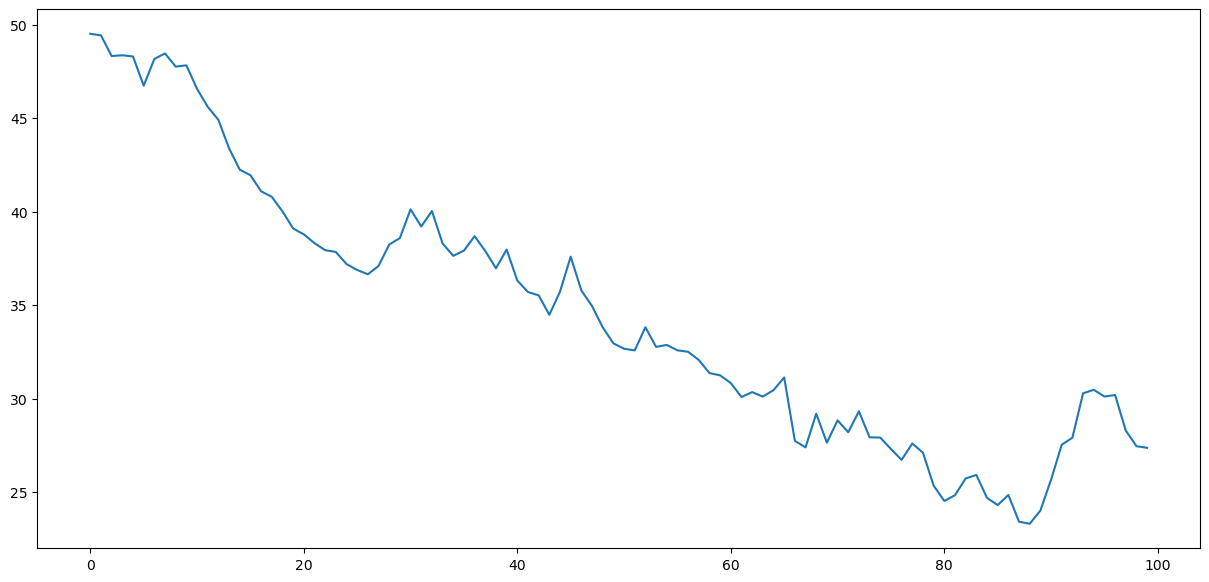

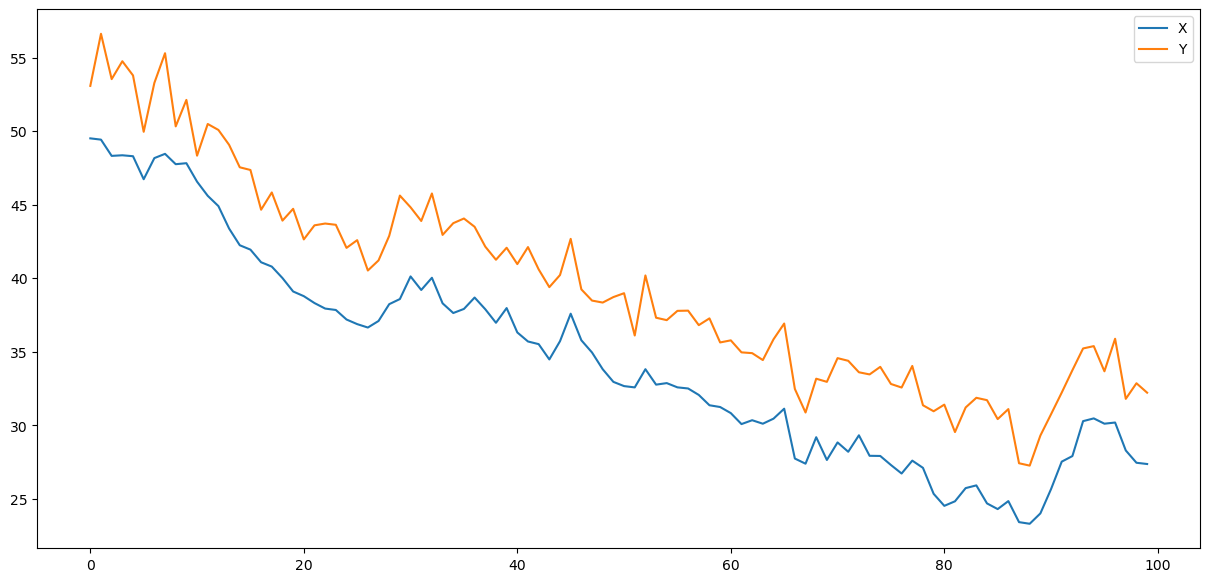

In [77]:
Xreturns = np.random.normal(0, 1, 100)

X = pd.Series(np.cumsum(
    Xreturns), name='X') + 50
X.plot(figsize=(15,7))

noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'

pd.concat([X, Y], axis=1).plot(figsize=(15, 7))

plt.show()

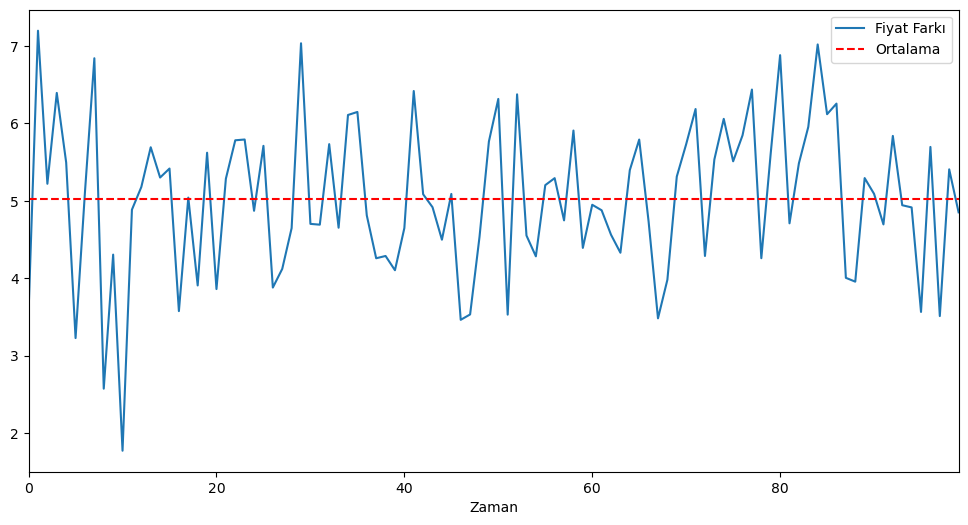

In [78]:
plt.figure(figsize=(12,6))
(Y - X).plot() 
plt.axhline((Y - X).mean(), color='red', linestyle='--') 
plt.xlabel('Zaman')
plt.xlim(0,99)
plt.legend(['Fiyat Farkı', 'Ortalama']);

#### Eşbütünleşme (Cointegration) Testi  

Eşbütünleşme testi prosedüründeki adımlar şunlardır:

1. Her bir bileşen serisi $y_{t}$ için tek değişkenli birim kök testleri (örneğin, ADF, PP testi) kullanılarak birim kök testi yapılır.  
2. Eğer birim kök reddedilemezse, bir sonraki adım bileşenler arasında eşbütünleşmeyi test etmektir. Yani, $\alpha Y_{t}$'nin I(0) olup olmadığını test etmektir.  

Eğer zaman serisinin birim köke sahip olduğunu bulursak, eşbütünleşme sürecine geçeriz. Eşbütünleşme testi için üç ana yöntem vardır: Johansen, Engle-Granger ve Phillips-Ouliaris. Biz öncelikli olarak Engle-Granger testini kullanacağız.  

$y_{t}$ için regresyon modelini ele alalım:  

$$y_{1t} = \delta D_{t} + \phi_{1t}y_{2t} + \phi_{m-1} y_{mt} + \varepsilon_{t} $$  

Burada, $D_{t}$ deterministik terimdir. Buradan, $\varepsilon_{t}$'nin $I(1)$ mi yoksa $I(0)$ mı olduğunu test edebiliriz. Hipotez testi şu şekildedir:  

$$
\begin{aligned}
H_{0} & :  \varepsilon_{t} \sim I(1) \implies y_{t} \ (eşbütünleşme \ yok)  \\
H_{1} & : \varepsilon_{t} \sim I(0) \implies y_{t} \ (eşbütünleşme \ var)  \\
\end{aligned}
$$  

$y_{t}$, *normalleştirilmiş eşbütünleşme vektörü* $\alpha = (1, \phi_{1}, \ldots,\phi_{m-1})$ ile eşbütünleşmiştir.  

Ayrıca, $\varepsilon_{t}$ artıklarını birim kök testi için kullanırız:  

$$
\begin{aligned}
H_{0} & :  \lambda = 0 \ (Birim \ Kök)  \\
H_{1} & : \lambda < 1 \ (Durağan)  \\
\end{aligned}
$$  

Bu hipotez testi aşağıdaki model içindir:  

$$\Delta\varepsilon_{t}=\lambda\varepsilon_{t-1}+\sum^{p-1}_{j=1}\varphi\Delta\varepsilon_{t-j}+\alpha_{t}$$  

Aşağıdaki denklem için test istatistiği:  

$$t_{\lambda}=\frac{\hat{\lambda}}{s_{\hat{\lambda}}} $$  

Artık iki zaman serisinin eşbütünleşmiş olup olmadığını anladığımıza göre, bunu test edebilir ve Python kullanarak ölçebiliriz.


In [79]:
score, pvalue, _ = coint(X,Y)
print(pvalue)

4.113092574155347e-16


> **❗ Dikkat:** Daha düşük değerler daha yüksek eşbütünlülüğe işaret etmez.

#### Korelasyon ve Eşbütünleşme  

Korelasyon ve eşbütünleşme teorik olarak benzer görünse de, pratikte oldukça farklıdır. Bunu göstermek için, korelasyonlu ancak eşbütünleşmemiş iki zaman serisi örneğine bakabiliriz.  

Bunun basit bir örneği, sadece birbirinden ayrılan (uzaklaşan) iki seridir.


(0.0, 99.0)

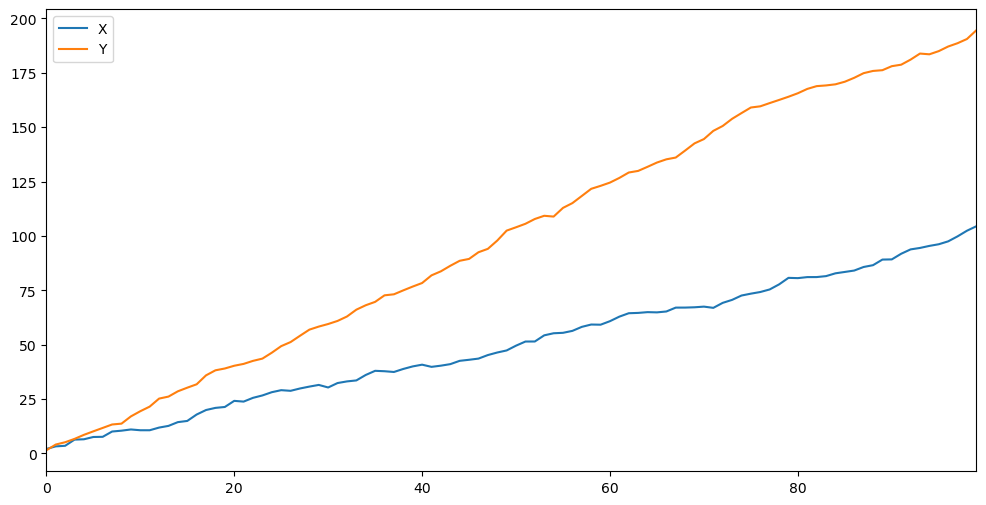

In [86]:
X_returns = np.random.normal(1, 1, 100)
Y_returns = np.random.normal(2, 1, 100)

X_diverging = pd.Series(np.cumsum(X_returns), name='X')
Y_diverging = pd.Series(np.cumsum(Y_returns), name='Y')


pd.concat([X_diverging, Y_diverging], axis=1).plot(figsize=(12,6));
plt.xlim(0, 99)

Şimdi, korelasyon katsayısı $r$'yi ve eşbütünleşme testinin sonucunu yazdırabiliriz.

In [87]:
print('Correlation: ' + str(X_diverging.corr(Y_diverging)))
score, pvalue, _ = coint(X_diverging,Y_diverging)
print('Cointegration test p-value: ' + str(pvalue))

Correlation: 0.9950687694381808
Cointegration test p-value: 0.9524157626265249


Görüldüğü gibi, X ve Y serileri arasında çok güçlü (neredeyse mükemmel) bir korelasyon vardır. Ancak, eşbütünleşme testi için elde ettiğimiz p-değeri 0.7092 olup, bu da X ve Y zaman serileri arasında eşbütünleşme olmadığını gösterir.  

Bu duruma başka bir örnek, normal dağılımlı bir seri ile kare dalga fonksiyonuna sahip bir seridir.

Correlation: 0.05105733936464006
Cointegration test p-value: 0.0


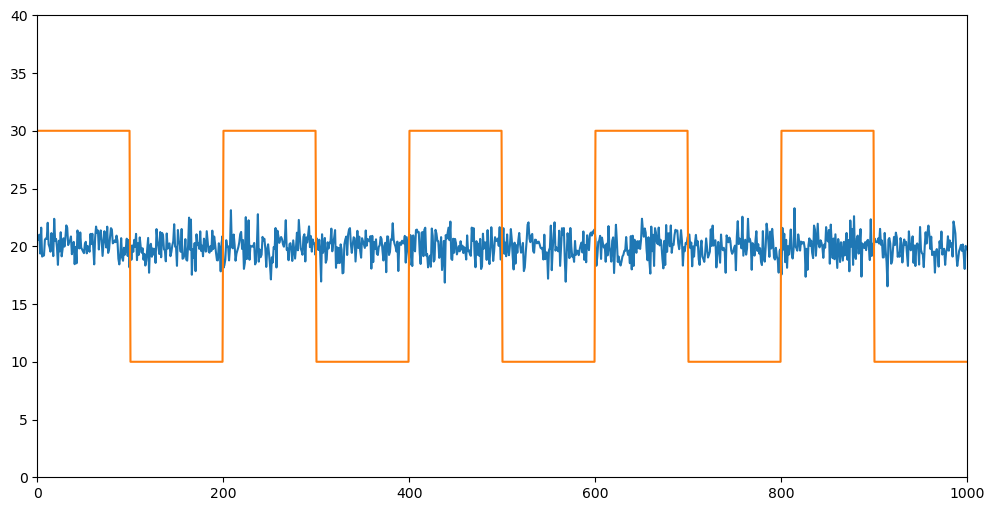

In [88]:
Y2 = pd.Series(np.random.normal(0, 1, 1000), name='Y2') + 20
Y3 = Y2.copy()

# Y2 = Y2 + 10
Y3[0:100] = 30
Y3[100:200] = 10
Y3[200:300] = 30
Y3[300:400] = 10
Y3[400:500] = 30
Y3[500:600] = 10
Y3[600:700] = 30
Y3[700:800] = 10
Y3[800:900] = 30
Y3[900:1000] = 10


plt.figure(figsize=(12,6))
Y2.plot()
Y3.plot()
plt.ylim([0, 40])
plt.xlim([0, 1000]);

# correlation is nearly zero
print( 'Correlation: ' + str(Y2.corr(Y3)))
score, pvalue, _ = coint(Y2,Y3)
print( 'Cointegration test p-value: ' + str(pvalue))

Korelasyon son derece düşük olmasına rağmen, p-değeri bu zaman serilerinin eşbütünleşik olduğunu göstermektedir.

# Genel Mekanizmanın İncelenmesi

Gerekli importları yapalım.

In [3]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from itertools import combinations
from joblib import Parallel, delayed
import seaborn as sns; sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Başlamadan önce, daha önce ele aldığımız kavramları kullanarak eşbütünleşmiş menkul kıymet çiftlerini kolayca bulmamızı sağlayacak bir fonksiyon tanımlayacağım.

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/data.csv", index_col=["Date"])

In [5]:
def test_cointegration(pair, data):
    S1, S2 = data[pair[0]], data[pair[1]]
    score, pvalue, _ = coint(S1, S2)
    return pair[0], pair[1], score, pvalue

def find_cointegrated_pairs(data, pvalue_threshold=0.05, n_jobs=-1):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = list(data.columns)

    # Compute cointegration tests in parallel
    results = Parallel(n_jobs=n_jobs)(delayed(test_cointegration)(pair, data) for pair in combinations(keys, 2))

    # Fill matrices and store pairs
    pairs = []
    for key1, key2, score, pvalue in results:
        i, j = keys.index(key1), keys.index(key2)
        score_matrix[i, j] = score
        pvalue_matrix[i, j] = pvalue
        if pvalue < pvalue_threshold:
            pairs.append((key1, key2))

    return score_matrix, pvalue_matrix, pairs

In [6]:
start_index = -504
end_index = -252 

In [7]:
two_year_ago_df = df[start_index:end_index]
one_year_ago_df = df[end_index:]

In [8]:
scores, pvalues, pairs = find_cointegrated_pairs(two_year_ago_df)

[('AEFES.IS', 'AKBNK.IS'), ('AEFES.IS', 'ASELS.IS'), ('AEFES.IS', 'BIMAS.IS'), ('AEFES.IS', 'ENKAI.IS'), ('AEFES.IS', 'GARAN.IS'), ('AEFES.IS', 'SAHOL.IS'), ('AEFES.IS', 'TCELL.IS'), ('AEFES.IS', 'YKBNK.IS'), ('AGHOL.IS', 'AKSA.IS'), ('AGHOL.IS', 'EREGL.IS'), ('AGHOL.IS', 'NTHOL.IS'), ('AGHOL.IS', 'PETKM.IS'), ('AGHOL.IS', 'SELEC.IS'), ('AGHOL.IS', 'TSKB.IS'), ('AKBNK.IS', 'ENKAI.IS'), ('AKBNK.IS', 'OTKAR.IS'), ('AKBNK.IS', 'TCELL.IS'), ('AKSA.IS', 'ASELS.IS'), ('AKSA.IS', 'BIMAS.IS'), ('AKSA.IS', 'BRYAT.IS'), ('AKSA.IS', 'CLEBI.IS'), ('AKSA.IS', 'ENKAI.IS'), ('AKSA.IS', 'ISCTR.IS'), ('AKSA.IS', 'KCHOL.IS'), ('AKSA.IS', 'MGROS.IS'), ('AKSA.IS', 'NTHOL.IS'), ('AKSA.IS', 'OTKAR.IS'), ('AKSA.IS', 'PETKM.IS'), ('AKSA.IS', 'SAHOL.IS'), ('AKSA.IS', 'TAVHL.IS'), ('AKSA.IS', 'TMSN.IS'), ('AKSA.IS', 'TSKB.IS'), ('AKSA.IS', 'TUPRS.IS'), ('AKSA.IS', 'TURSG.IS'), ('AKSA.IS', 'YKBNK.IS'), ('AKSEN.IS', 'ALARK.IS'), ('AKSEN.IS', 'ARCLK.IS'), ('AKSEN.IS', 'FROTO.IS'), ('AKSEN.IS', 'HALKB.IS'), ('AKSEN

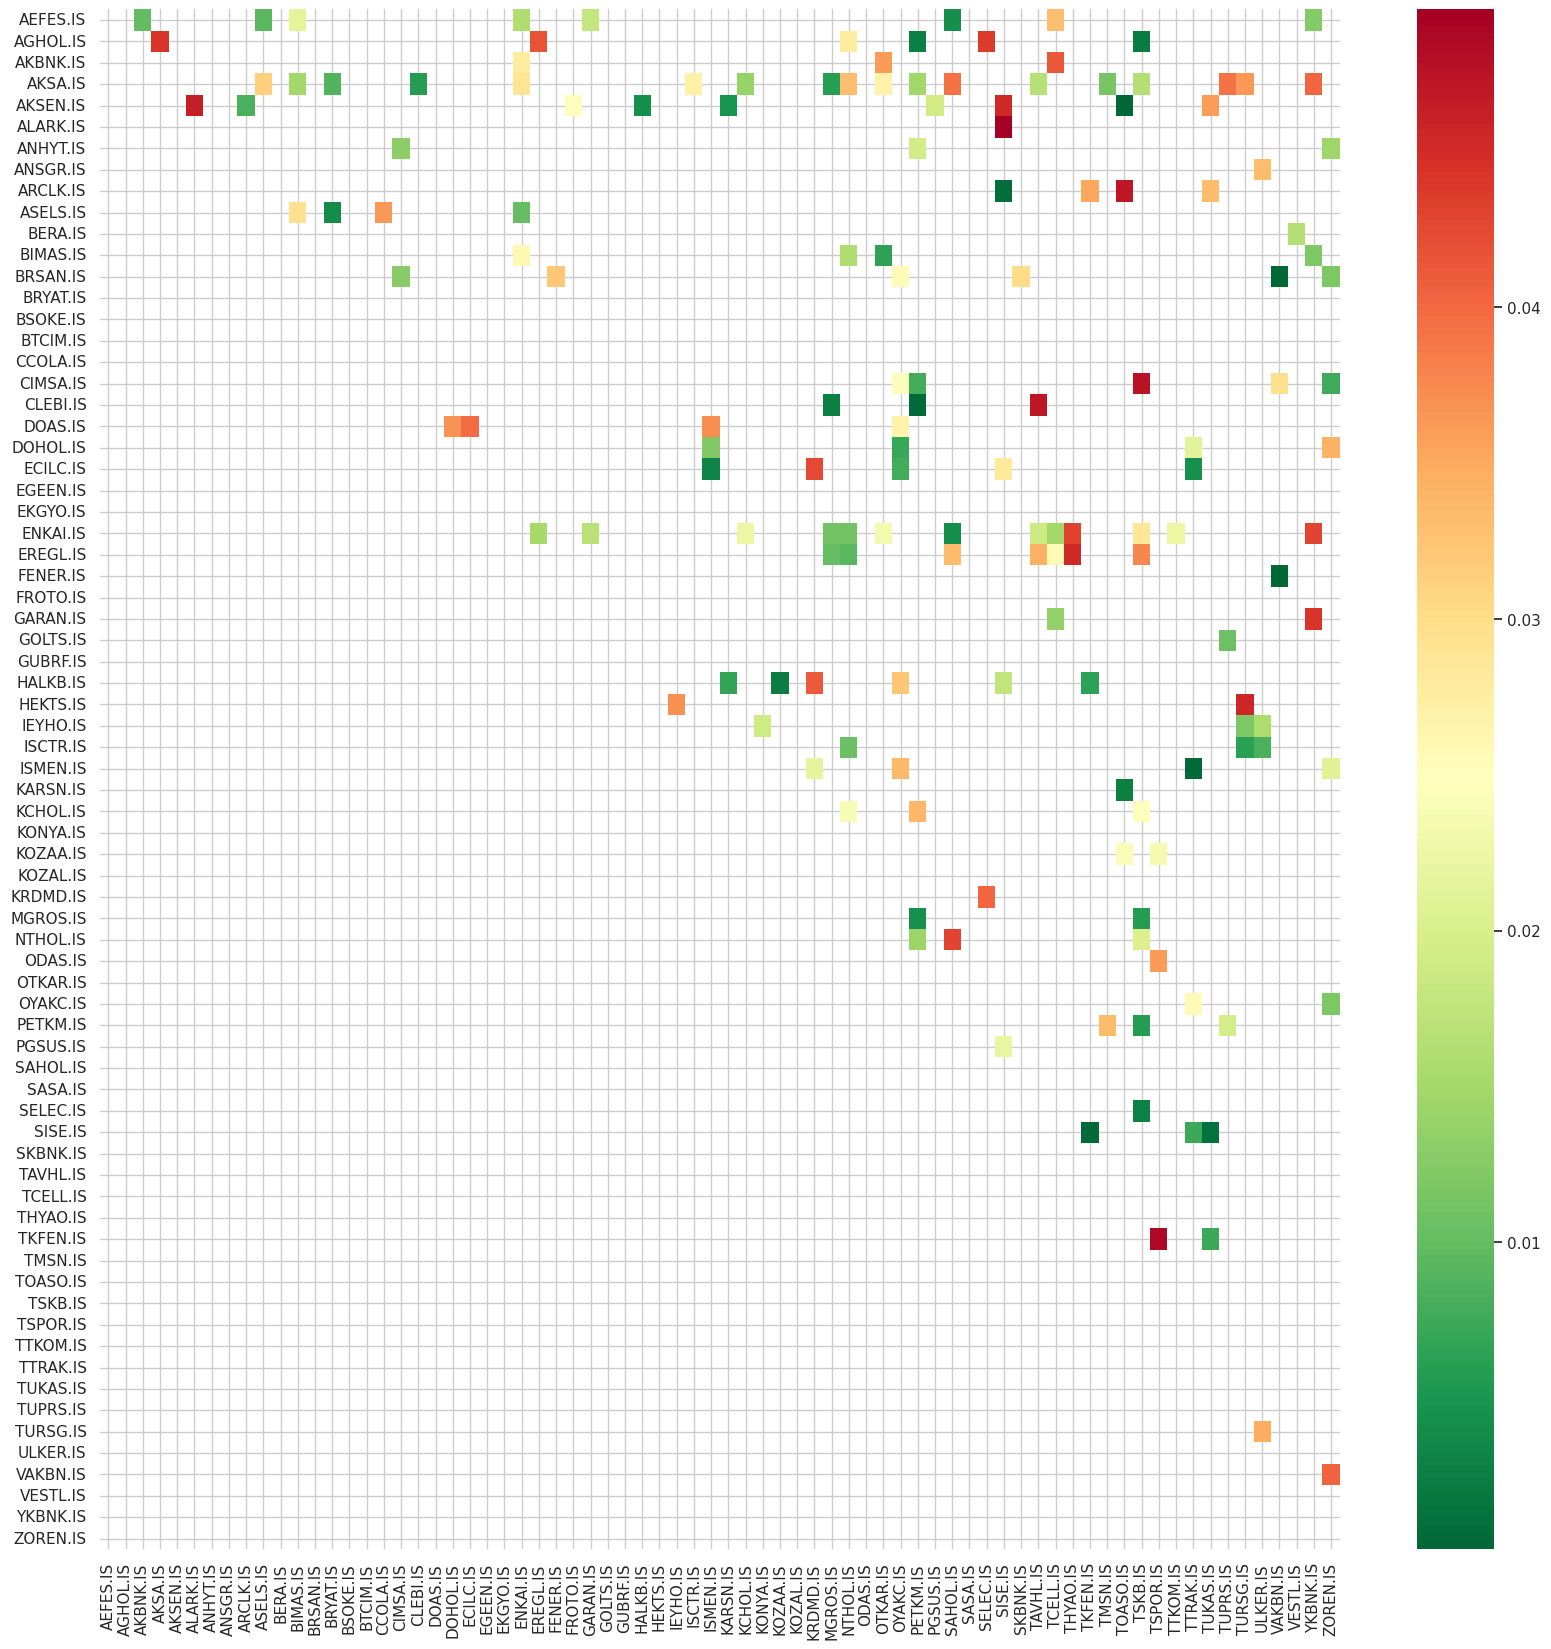

In [9]:
import seaborn
fig, ax = plt.subplots(figsize=(20,20))
seaborn.heatmap(pvalues, xticklabels=df.columns, yticklabels=df.columns, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05)
                )
print(pairs)

Algoritmamız, eşbütünleşmiş bir çok çift belirledi. Fiyat hareketlerini analiz ederek herhangi bir anormallik olup olmadığını kontrol edebiliriz.


In [10]:
stock_1 = 'AEFES.IS'
stock_2 = 'ASELS.IS'

In [11]:
S1 = two_year_ago_df[stock_1]
S2 = two_year_ago_df[stock_2]

score, pvalue, _ = coint(S1, S2)
pvalue

0.00937279534637661

Görüldüğü gibi, p-değeri 0.05'ten küçük, bu da AEFES.IS ve AKBNK.IS'nin gerçekten eşbütünleşmiş çiftler olduğunu gösteriyor.

#### Farkın (Spread) Hesaplanması  

Şimdi, iki zaman serisinin farkını görselleştirebiliriz. Farkı hesaplamak için, iki menkul kıymet arasındaki doğrusal kombinasyonu oluşturmak amacıyla doğrusal regresyon kullanarak katsayıyı belirleriz. Daha önce bahsettiğimiz Engle-Granger yöntemi bu yaklaşımı temel alır.

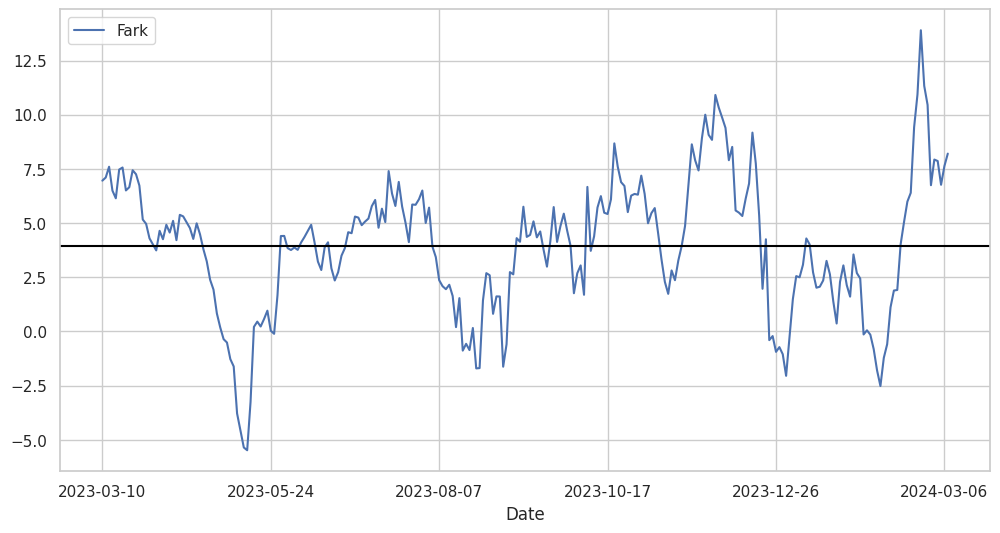

In [12]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1[stock_1]
b = results.params[stock_1]

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.legend(['Fark']);

Alternatif olarak, iki zaman serisi arasındaki oranı da inceleyebiliriz.

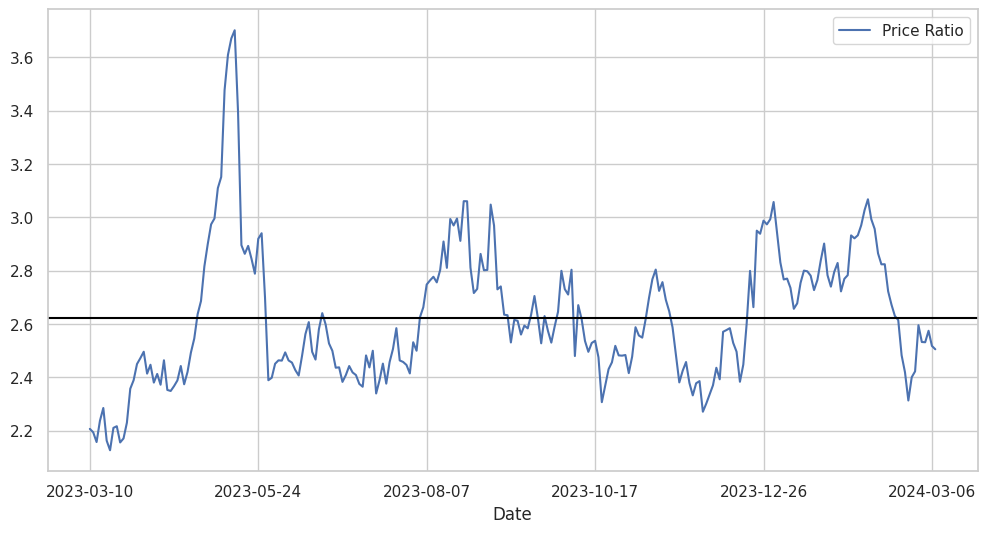

In [13]:
ratio = S1/S2
ratio.plot(figsize=(12,6))
plt.axhline(ratio.mean(), color='black')
plt.legend(['Price Ratio']);

İster fark (spread) yaklaşımını ister oran yaklaşımını kullanalım, ilk grafik çiftimiz olan AEFES/AKBNK'nin ortalama etrafında hareket etme eğiliminde olduğunu görebiliriz. Şimdi, bu oranı standartlaştırmamız gerekiyor, çünkü mutlak oran bu trendi analiz etmek için en ideal yöntem olmayabilir. Bunun için z-skorlarını kullanmalıyız.  

Z-skoru, bir veri noktasının ortalamadan kaç standart sapma uzaklıkta olduğunu gösterir. Daha da önemlisi, ham değerin popülasyon ortalamasına göre kaç standart sapma yukarıda veya aşağıda olduğunu belirtir.  

Z-skoru şu şekilde hesaplanır:  

$$\mathcal{z}_{i}=\frac{x_{i}-\bar{x}}{s} $$  

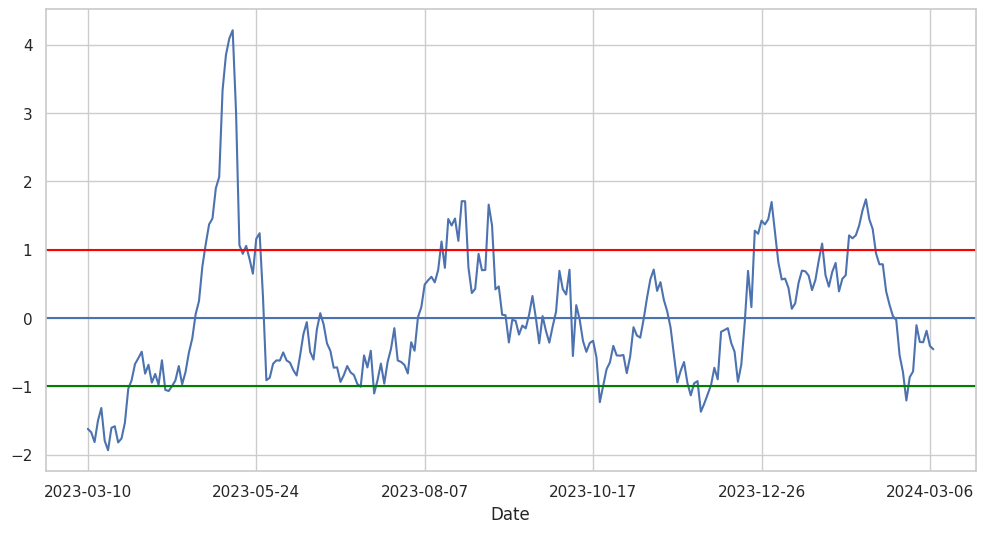

In [14]:
def zscore(series):
    return (series - series.mean()) / np.std(series)


zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

Z-skorunu 1 ve -1 değerlerinde belirleyerek iki referans çizgisi eklediğimizde, büyük sapmaların çoğunlukla tekrar ortalamaya döndüğünü açıkça görebiliriz. Bu, tam olarak çiftler ticareti (pairs trading) stratejisi için aradığımız özelliktir.

### İşlem Sinyalleri  

Herhangi bir işlem stratejisi yürütürken, ne zaman işlem yapacağınızı açıkça tanımlamak ve belirlemek önemlidir. Yani, belirli bir hisse senedini alıp satmam gerektiğini gösteren en iyi gösterge nedir?  

#### Kuralların Belirlenmesi  

Oluşturduğumuz oran zaman serisini kullanarak belirli bir zamanda alım veya satım yapmamız gerekip gerekmediğini anlamaya çalışacağız. Öncelikle, bir tahmin değişkeni olan $Y$'yi oluşturacağız. Eğer oran pozitifse, bu bir "alım" sinyali verecek; aksi takdirde, bir "satış" sinyali verecektir. Tahmin modeli şu şekildedir:  

$$Y_{t} = sign(Ratio_{t+1}-Ratio_{t}) $$  

Çiftler ticareti sinyallerinin en büyük avantajı, fiyatların tam olarak nereye gideceğini bilmemize gerek olmamasıdır. Tek ihtiyacımız olan, fiyatların yukarı mı yoksa aşağı mı hareket ettiğini belirlemektir.

#### Eğitim ve Test Veri Seti Ayrımı  

Bir modeli eğitirken ve test ederken, genellikle veriyi %70/30 veya %80/20 oranında bölmek yaygındır. Ancak, burada yalnızca 252 veri noktası (bir yıl içindeki işlem günleri) içeren bir zaman serisi kullandık.  

Eğitim ve test veri setini ayırmadan önce, her zaman serisine daha fazla veri noktası ekleyeceğiz.

In [15]:
ratios = two_year_ago_df[stock_1] / two_year_ago_df[stock_2] 

#### Öznitelik Mühendisliği (Feature Engineering)  

Oran hareketlerinin yönünü belirlemede hangi özelliklerin önemli olduğunu bulmamız gerekiyor. Oranların eninde sonunda ortalamaya geri döndüğünü bildiğimiz için, hareketli ortalamalar ve ortalama ile ilgili metrikler muhtemelen önemli olacaktır.  

Şu öznitelikleri kullanmayı deneyelim:  

* Oranın 60 günlük hareketli ortalaması  
* Oranın 5 günlük hareketli ortalaması  
* 60 günlük standart sapma  
* Z-skoru  

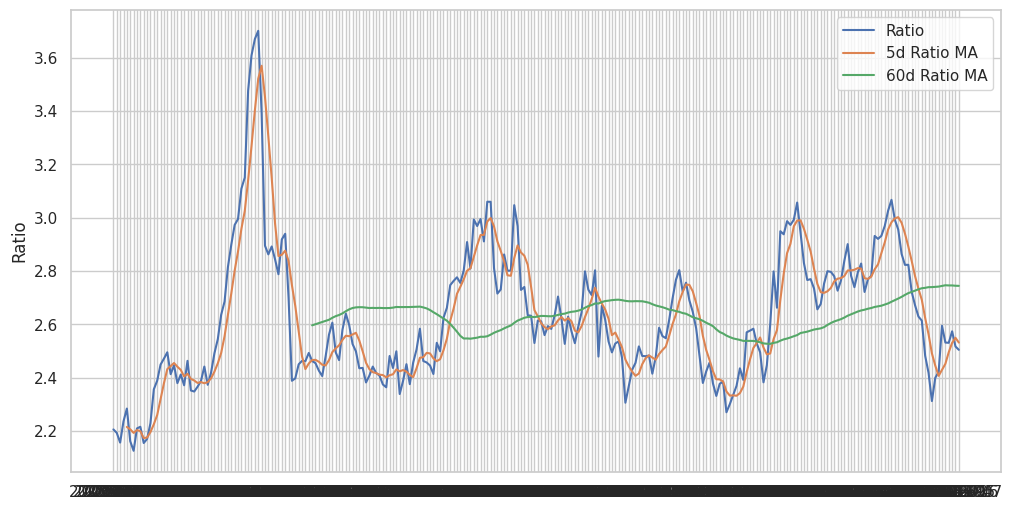

In [16]:
ratios_mavg5 = ratios.rolling(window=5, center=False).mean()
ratios_mavg60 = ratios.rolling(window=60, center=False).mean()
std_60 = ratios.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(ratios.index, ratios.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

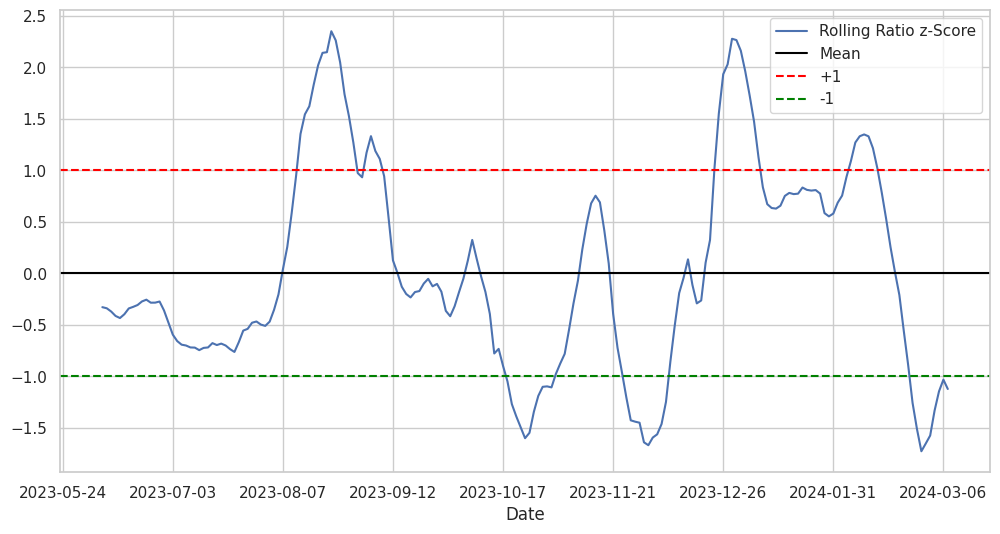

In [17]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

#### Model Oluşturma  

Standart normal dağılımın ortalaması 0 ve standart sapması 1'dir. Grafiğe baktığımızda, zaman serisinin ortalamadan 1 standart sapma uzaklaştığında genellikle tekrar ortalamaya döndüğünü açıkça görebiliriz.  

Bu modeli kullanarak aşağıdaki işlem sinyallerini oluşturabiliriz:  

* **Al (1):** Z-skoru -1'in altına düştüğünde, yani oranın artmasını beklediğimizde.  
* **Sat (-1):** Z-skoru 1'in üzerine çıktığında, yani oranın düşmesini beklediğimizde.  

#### Modelin Eğitimi ve Optimizasyonu  

Modelimizi gerçek veriler üzerinde kullanabiliriz.


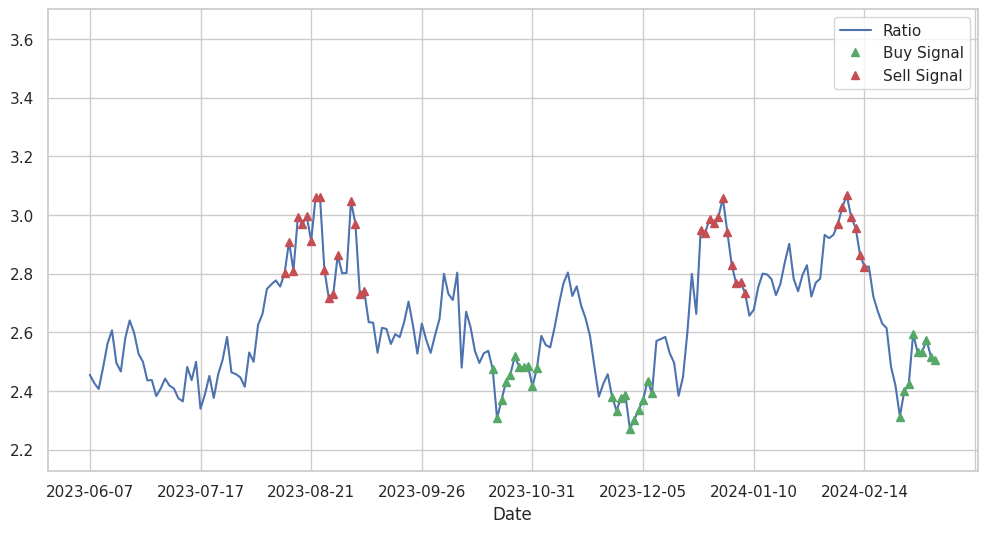

In [18]:
plt.figure(figsize=(12,6))

ratios[60:].plot()
buy = ratios.copy()
sell = ratios.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

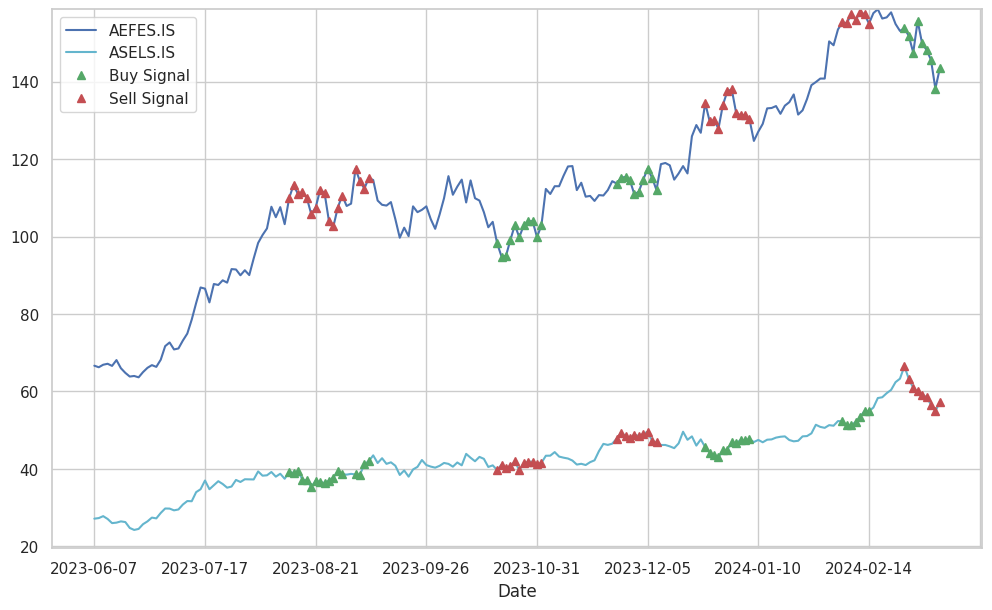

In [19]:
plt.figure(figsize=(12,7))
S1 = two_year_ago_df[stock_1]
S2 = two_year_ago_df[stock_2]

S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))


plt.legend([stock_1, stock_2, 'Buy Signal', 'Sell Signal'])
plt.show()

Şimdi, ilgili hisse senetlerinde ne zaman alım veya satım yapmamız gerektiğini net bir şekilde görebiliyoruz.  

Peki, bu stratejiden ne kadar kazanç bekleyebiliriz?

In [20]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    zscore.dropna(inplace=True)
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in zscore.index:
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money

In [21]:
def trade(S1, S2, window1, window2, total_investment=10000, trade_fraction=0.1):
    """
    İki zaman serisi S1 ve S2 için, belirlenen pencere uzunluklarına göre basit bir işlem stratejisi simüle eder.
    
    Parametreler:
      - total_investment: Başlangıçtaki toplam sermaye.
      - trade_fraction: Her işlemde kullanılacak sermaye oranı (örneğin 0.1, %10 yatırım demektir).
      
    Sinyaller:
      * zscore > 1  => S1 alınır, S2 short edilir.
      * zscore < -1 => S1 short edilir, S2 alınır.
      * abs(zscore) < 0.75 => Açık işlem kapatılır.
      
    Not: BIST'te parçalı alım mümkün olmadığı için, alım/satım miktarları tam sayı hisse olarak hesaplanır.
    """
    if window1 == 0 or window2 == 0:
        return 0, 0, total_investment  # (net kar, %kar, kalan nakit)

    # Giriş sinyalleri için hesaplamalar:
    ratios = S1 / S2
    ma1 = ratios.rolling(window=window1).mean()
    ma2 = ratios.rolling(window=window2).mean()
    std = ratios.rolling(window=window2).std()
    zscore = (ma1 - ma2) / std
    zscore.dropna(inplace=True)

    cash = total_investment
    open_trade = False      # İşlem açık mı?
    trade_direction = 0     # 1: S1 long, S2 short; -1: S1 short, S2 long
    entry_shares_S1 = 0
    entry_shares_S2 = 0
    entry_price_S1 = 0
    entry_price_S2 = 0
    entry_notional = 0      # İşleme başlarken kullanılan notional yatırım

    total_trade_profit = 0
    total_trade_investment = 0

    for date in zscore.index:
        # İşlem açma sinyali (aktif işlem yoksa)
        if not open_trade:
            if zscore.loc[date] > 1:
                # S1 alınır, S2 short edilir.
                notional = total_investment * trade_fraction
                leg_notional = notional / 2  # Her iki kola eşit yatırım
                # Tam sayı hisse alımını sağlamak için:
                shares_S1 = int(leg_notional / S1.loc[date])
                shares_S2 = int(leg_notional / S2.loc[date])
                # Eğer herhangi birinde sıfır hisse alınıyorsa, işlem açılmaz.
                if shares_S1 == 0 or shares_S2 == 0:
                    continue
                entry_shares_S1 = shares_S1       # Long pozisyon
                entry_shares_S2 = shares_S2       # Short pozisyon (karşı taraf)
                trade_direction = 1
                open_trade = True
                entry_price_S1 = S1.loc[date]
                entry_price_S2 = S2.loc[date]
                entry_notional = notional
            elif zscore.loc[date] < -1:
                # S1 short edilir, S2 alınır.
                notional = total_investment * trade_fraction
                leg_notional = notional / 2
                shares_S1 = int(leg_notional / S1.loc[date])
                shares_S2 = int(leg_notional / S2.loc[date])
                if shares_S1 == 0 or shares_S2 == 0:
                    continue
                entry_shares_S1 = -shares_S1      # Short pozisyon
                entry_shares_S2 = shares_S2       # Long pozisyon
                trade_direction = -1
                open_trade = True
                entry_price_S1 = S1.loc[date]
                entry_price_S2 = S2.loc[date]
                entry_notional = notional
        else:
            # Açık işlem varsa, çıkış sinyali kontrolü:
            if abs(zscore.loc[date]) < 0.75:
                # İşlem kapatılıyor:
                if trade_direction == 1:
                    # S1 long, S2 short:
                    pnl = (S1.loc[date] - entry_price_S1) * entry_shares_S1 \
                          + (entry_price_S2 - S2.loc[date]) * entry_shares_S2
                else:
                    # S1 short, S2 long:
                    pnl = (entry_price_S1 - S1.loc[date]) * abs(entry_shares_S1) \
                          + (S2.loc[date] - entry_price_S2) * entry_shares_S2
                total_trade_profit += pnl
                total_trade_investment += entry_notional
                cash += pnl

                # İşlem kapatılıyor:
                open_trade = False
                trade_direction = 0
                entry_shares_S1 = 0
                entry_shares_S2 = 0

    # Döngü sonunda açık işlem varsa, son tarihte kapat:
    if open_trade:
        last_date = zscore.index[-1]
        if trade_direction == 1:
            pnl = (S1.loc[last_date] - entry_price_S1) * entry_shares_S1 \
                  + (entry_price_S2 - S2.loc[last_date]) * entry_shares_S2
        else:
            pnl = (entry_price_S1 - S1.loc[last_date]) * abs(entry_shares_S1) \
                  + (S2.loc[last_date] - entry_price_S2) * entry_shares_S2
        total_trade_profit += pnl
        total_trade_investment += entry_notional
        cash += pnl

    pct_profit = (total_trade_profit / total_trade_investment * 100) if total_trade_investment != 0 else 0

    return total_trade_profit, pct_profit, cash


In [22]:
trade(two_year_ago_df[stock_1], two_year_ago_df[stock_2], 5, 60)

(-217.68003082275408, -3.628000513712568, 9782.319969177246)

In [23]:
length_scores = np.array([trade(two_year_ago_df[stock_1], two_year_ago_df[stock_2], l, 5)[1] for l in range(255)])
best_length = np.argmax(length_scores)
print('Best window length:', best_length)
print(f"Profit: {length_scores[best_length]}")

Best window length: 183
Profit: 7.58233388264974


In [24]:
trade(one_year_ago_df[stock_1], one_year_ago_df[stock_2], 5, 120)

(232.99993896484398, 11.6499969482422, 10232.999938964844)

Görüldüğü gibi, en uygun pencere uzunluğumuz 5 gün ile 250 gün arasındadır. Ancak, bunu test verileriyle karşılaştırdığımızda, bu pencere uzunluğunun aslında optimal olmaktan uzak olduğunu görebiliriz. Bunun nedeni, başlangıçta seçtiğimiz pencere uzunluğunun muhtemelen örnekleme verilerine aşırı uyum sağlamış (overfit) olmasıdır.

In [25]:
length_scores2 = np.array([trade(one_year_ago_df[stock_1], one_year_ago_df[stock_2], l, 5)[1] for l in range(255)])
best_length2 = np.argmax(length_scores2)
print('Best window length:', best_length2)
print(f"Profit: {length_scores2[best_length2]}")

Best window length: 251
Profit: 1.4400024414062387


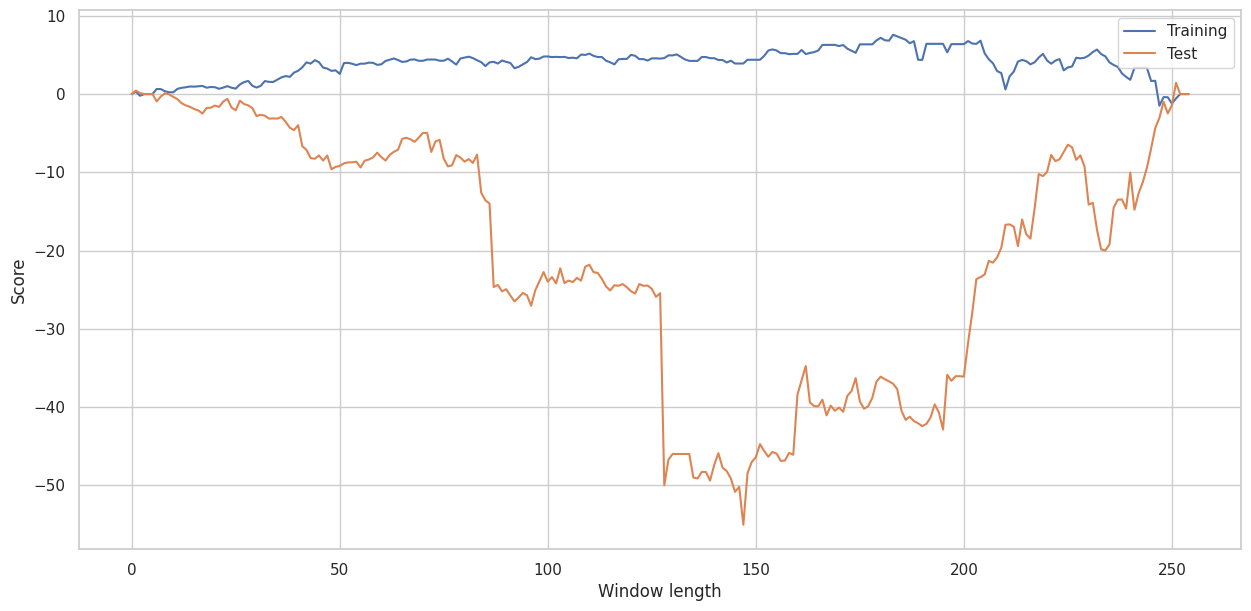

In [26]:
plt.figure(figsize=(15,7))
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()

Bu nedenle, yaklaşık 50 günün üzerindeki herhangi bir pencere uzunluğunu kullanmak iyi bir tercih olacaktır. Aşırı uyumu (overfitting) önlemek için, pencere uzunluğumuzu belirlerken ekonomik mantığa dayalı bir seçim yapabiliriz.  

# MEDYUM TRADER

In [30]:
def medyum_trader(prices, initial_capital=10000):
    capital = initial_capital
    n_days = len(prices)
    
    # Son gün için işlem yapılamayacağı için n_days-1 kadar döngüye giriyoruz
    for i in range(n_days - 1):
        today = prices.iloc[i]
        tomorrow = prices.iloc[i+1]
        
        # Her hisse için oransal getiri hesaplanır
        returns = (tomorrow / today) - 1
        
        # En yüksek getiriyi sağlayan hisse seçilir
        best_stock = returns.idxmax()
        best_return = returns[best_stock]
        
        # Tüm sermaye o hisseye yatırılıp ertesi gün satılır
        capital = capital * (1 + best_return)
    
    pct_profit = (capital / initial_capital - 1) * 100
    return pct_profit

In [59]:
from IPython.display import display, HTML

s_date = "2024-03-08"
e_date = "2025-03-01"
profit_2024_2025 = medyum_trader(one_year_ago_df)

html_output = f"""
<p style="font-size: 16px; font-weight: bold; color: white;">
    Medyumun <span style="color: lightblue;">{s_date} / {e_date}</span> tarihleri arasındaki getirisi:
    <span style="color: lightgreen; font-weight: bold;">{profit_2024_2025 * 100:.2f}%</span>
</p>
"""

# HTML formatında çıktıyı görüntüle
display(HTML(html_output))

# BUY&HOLD TRADER (YATICI)

In [31]:
def calculate_portfolio_profit(data, tickers, weights, start_date, end_date):
    data_filtered = data.loc[start_date:end_date, tickers].copy()
    log_returns = np.log(data_filtered / data_filtered.shift(1)).dropna()
    total_log_return = log_returns.sum()
    total_return = np.exp(total_log_return) - 1
    portfolio_return = np.dot(weights, total_return)
    return portfolio_return

In [56]:
from IPython.display import display, HTML

tickers = ['BRSAN.IS', 'ANSGR.IS', 'TURSG.IS', 'BTCIM.IS', 'OYAKC.IS']
weights = np.array([0.10827083, 0.28059675, 0.32216874, 0.14116987, 0.1477938])
s_date = "2024-03-08"
e_date = "2025-03-01"
profit_2024_2025 = calculate_portfolio_profit(
    data=df,
    tickers=tickers,
    weights=weights,
    start_date=s_date,
    end_date=e_date
)


html_output = f"""
<p style="font-size: 16px; font-weight: bold; color: white;">
    Portföyünüzün <span style="color: lightblue;">{s_date} / {e_date}</span> tarihleri arasındaki getirisi:
    <span style="color: lightgreen; font-weight: bold;">{profit_2024_2025 * 100:.2f}%</span>
</p>
"""

# HTML formatında çıktıyı görüntüle
display(HTML(html_output))

# Yapay Zeka Destekli Çift Seçici

In [61]:
results_df = pd.read_csv("../data/results.csv")

In [65]:
def plot_hist(data):
    plt.figure(figsize=(8, 6))
    plt.hist(data['Return'], bins=100, edgecolor='black')
    plt.xlabel('Return Değeri')
    plt.ylabel('Frekans')
    plt.title('Return Değerlerinin Histogramı')
    plt.show()

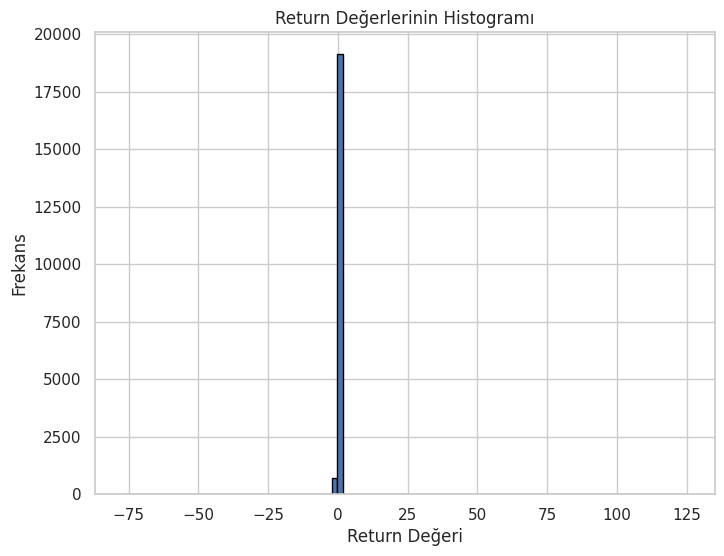

In [66]:
plot_hist(results_df)

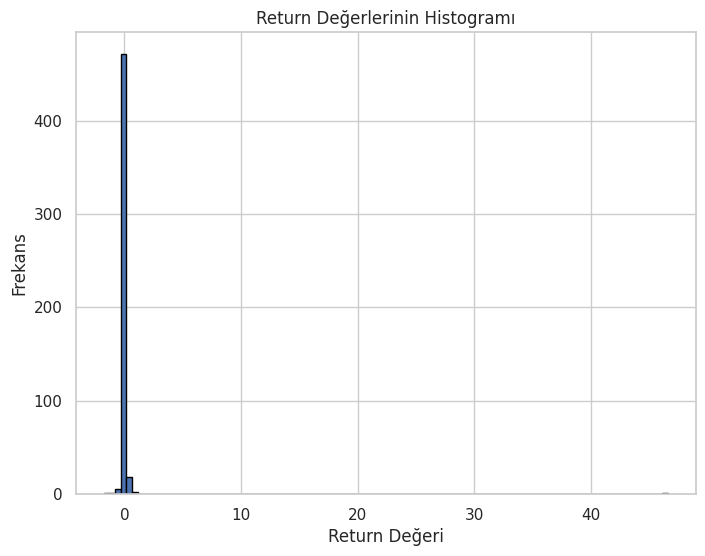

In [67]:
results_df = results_df[-500:]
plot_hist(results_df)

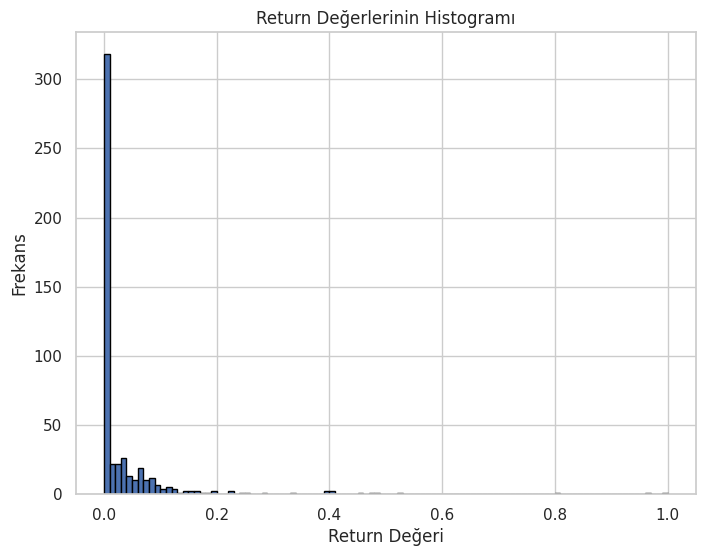

In [68]:
results_df['Return'] = results_df['Return'].apply(lambda x: x if x > 0 else 0)
results_df['Return'] = results_df['Return'].apply(lambda x: x if x < 1 else 1)
plot_hist(results_df)

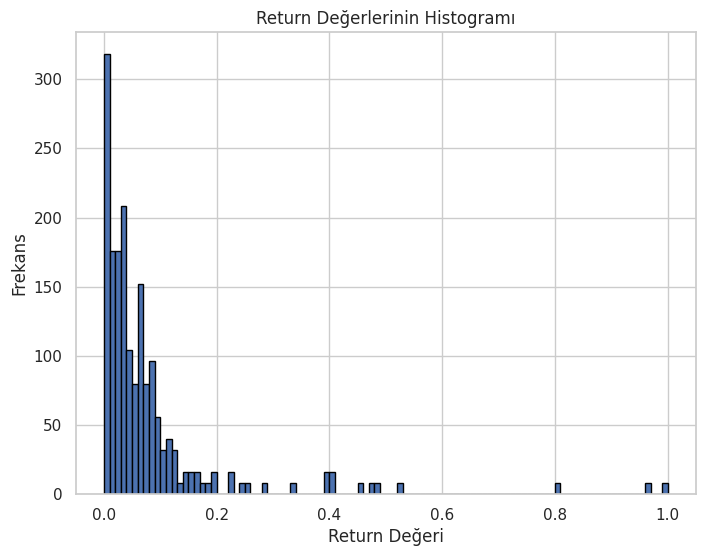

In [69]:
for i in range(3):
    results_df = pd.concat([results_df, results_df[results_df['Return'] > 0.01]])
plot_hist(results_df)